# Importing the libraries and loading in the dataset

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv('/Users/andrewchavarria/Desktop/JupyterLab/HotelReservation/Hotel_Reservations.csv')

# Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.shape

(36275, 19)

In [5]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
df.describe(include=[object, int])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
count,36275,36275.00,36275.00,36275.00,36275.00,36275,36275.00,36275,36275.00,36275.00,36275.00,36275.00,36275,36275.00,36275.00,36275.00,36275.00,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,24390
mean,NaN,1.84,0.11,0.81,2.20,NaN,0.03,NaN,85.23,2017.82,7.42,15.60,NaN,0.03,0.02,0.15,0.62,NaN
std,NaN,0.52,0.40,0.87,1.41,NaN,0.17,NaN,85.93,0.38,3.07,8.74,NaN,0.16,0.37,1.75,0.79,NaN
min,NaN,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,2017.00,1.00,1.00,NaN,0.00,0.00,0.00,0.00,NaN
25%,NaN,2.00,0.00,0.00,1.00,NaN,0.00,NaN,17.00,2018.00,5.00,8.00,NaN,0.00,0.00,0.00,0.00,NaN
50%,NaN,2.00,0.00,1.00,2.00,NaN,0.00,NaN,57.00,2018.00,8.00,16.00,NaN,0.00,0.00,0.00,0.00,NaN
75%,NaN,2.00,0.00,2.00,3.00,NaN,0.00,NaN,126.00,2018.00,10.00,23.00,NaN,0.00,0.00,0.00,1.00,NaN


In [6]:
for col in df.columns:
    print("Column: "+ str(col)+" = "+ str(df[col].unique()))

Column: Booking_ID = ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
Column: no_of_adults = [2 1 3 0 4]
Column: no_of_children = [ 0  2  1  3 10  9]
Column: no_of_weekend_nights = [1 2 0 4 3 6 5 7]
Column: no_of_week_nights = [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
Column: type_of_meal_plan = ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Column: required_car_parking_space = [0 1]
Column: room_type_reserved = ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Column: lead_time = [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273 

In [7]:
# Returns whether or not our dataframe contains any null values. There are no values indicated in the dataset dictionary 
# indicating that another value would representing missing data.
print("Missing values in the dataset?: "+ str(df.isnull().values.any()))

Missing values in the dataset?: False


# Preprocessing and Feature Engineering

In [8]:
# Remove Booking_ID since this feature is irrelevant to predicting a cancellation
df = df.drop('Booking_ID',axis=1)

Features market_segment_type, booking_status, type_of_meal_plan, room_type_reserved need to be encoded. All of these featues have a relatively small number of categories (no greater than 7), so we will use one-hot enconding.

In [9]:
# Encode booking_status
df = pd.get_dummies(df, columns=['booking_status'],drop_first=True)
df = pd.get_dummies(df, columns=['type_of_meal_plan'],drop_first=True)
df = pd.get_dummies(df, columns=['room_type_reserved'], drop_first=True)

In [10]:
# market_segment_type is handled differently because the first column is not one of the most common types. 
# Removing market_segment_type_Online reduces VIF greater than any other type
df = pd.get_dummies(df, columns=['market_segment_type'],drop_first=False)
df = df.drop('market_segment_type_Online', axis=1)

In [11]:
df['arrival_year'] = df.apply(lambda row: 1 if ((row['arrival_year'] == 2018)) else 0, axis=1)

In [12]:
# Create feature that captures range for time of month
df['time_of_month'] = df.apply(lambda row: 'beginning' if ((row['arrival_date'] < 11)) else 
                               ('Middle' if ((row['arrival_date'] < 22)) else 'End' ), axis=1)

In [13]:
df = df.drop('arrival_date', axis=1)
df = pd.get_dummies(df, columns=['time_of_month'], drop_first=True)

We are ready to visualize the data.

# Data Visualization

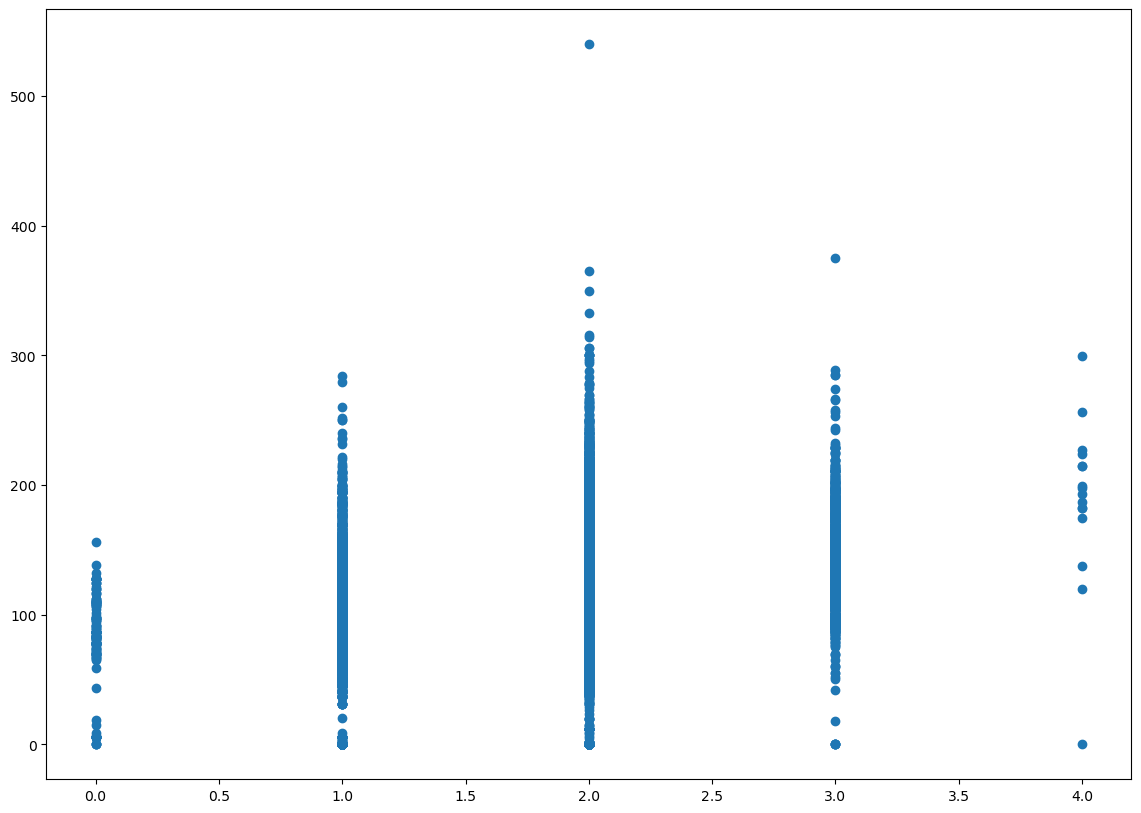

In [14]:
plt.figure(figsize=(14,10))
plt.scatter(df['no_of_adults'], df["avg_price_per_room"])

[Text(0, 0, '11885'), Text(0, 0, '24390')]

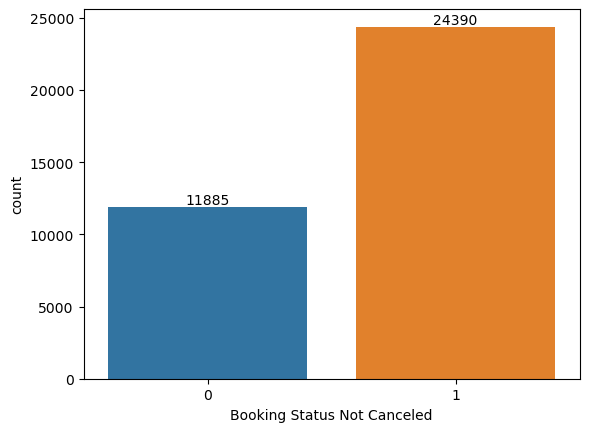

In [15]:
ax = sns.countplot(x=df["booking_status_Not_Canceled"])
ax.set_xlabel("Booking Status Not Canceled")
plt.bar_label(ax.containers[0])

We see about a 1:2 ratio between our target variable categories.

<AxesSubplot: xlabel='no_of_week_nights', ylabel='count'>

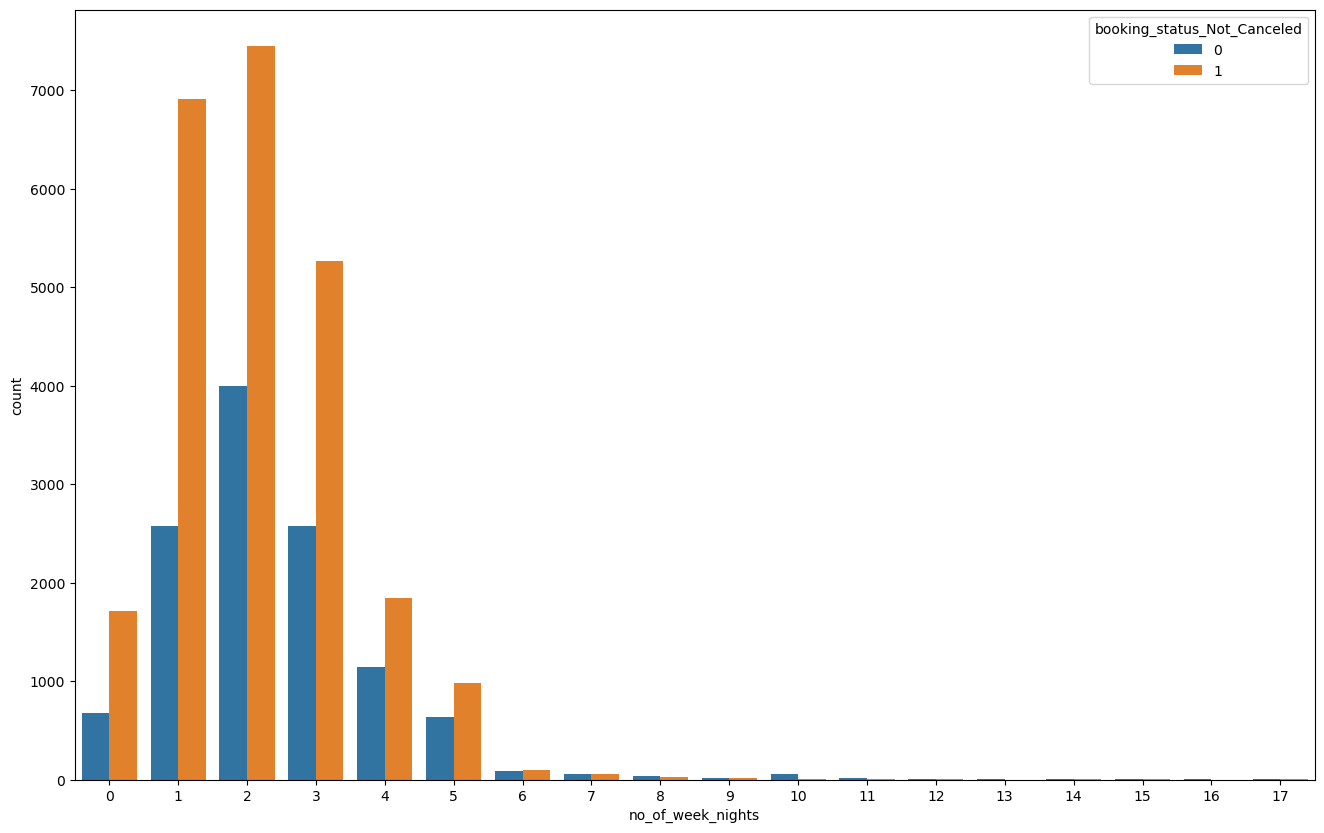

In [16]:
plt.figure(figsize=(16,10))

sns.countplot(x="no_of_week_nights",data=df,hue="booking_status_Not_Canceled")

The disparity between booking cancellations and non-cancellations decreases as the number of week nights reserved increases. Eventually, the cancellations exceed the non-cancellations.

# Model Selection

In [17]:
# Scale the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the non-binary columns
columns_to_scale = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 
                    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                   'no_of_special_requests']

for col in columns_to_scale:
    df[col] = scaler.fit_transform(df.loc[:,[col]])
    
X = df.drop('booking_status_Not_Canceled',axis=1)
y = df['booking_status_Not_Canceled']


In [18]:
from sklearn.model_selection import train_test_split
# Get 80% of the dataset as the training set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
X_train_scaled = (X_train)
X_test_scaled = (X_test)

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Performance Metrics

In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_train_scaled)
print("Classification report for the training set: ")
print(classification_report(y_train, y_pred))

y_pred = model.predict(X_test_scaled)
print("Classification report for the dev set: ")
print(classification_report(y_test, y_pred))

Classification report for the training set: 
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      8278
           1       0.83      0.89      0.86     17114

    accuracy                           0.80     25392
   macro avg       0.78      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392

Classification report for the dev set: 
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      3607
           1       0.83      0.90      0.86      7276

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



In [22]:
# evaluate the pipeline with 10-fold cross validation
cv = KFold(n_splits=10, shuffle = True, random_state=1)
n_scores = cross_validate(model, X, y, scoring=['accuracy', 'precision', 'recall'], cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print("10-fold Cross Validation results for logistic regression:")
print("Accuracy: %.3f (%.3f)" % (np.mean(n_scores['test_accuracy']), np.std(n_scores['test_accuracy'])))
print("Precision: %.3f (%.3f)" %  (np.mean(n_scores['test_precision']), np.std(n_scores['test_precision'])))
print("Recall: %.3f (%.3f)" %  (np.mean(n_scores['test_recall']), np.std(n_scores['test_recall'])))

10-fold Cross Validation results for logistic regression:
Accuracy: 0.805 (0.005)
Precision: 0.831 (0.009)
Recall: 0.891 (0.004)


In [23]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the model
cm = confusion_matrix(y_test,y_pred)

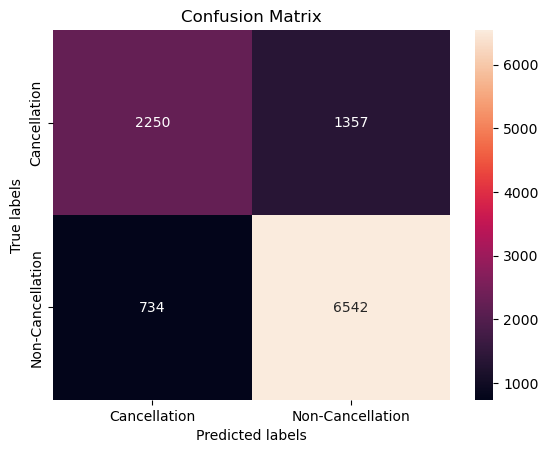

In [24]:
# Plot the confusion matrix onto a heatmap to display
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Cancellation', 'Non-Cancellation']); ax.yaxis.set_ticklabels(['Cancellation', 'Non-Cancellation']);

Overfitting does not appear to be a problem in our model. The performance between the training set and test set are quite similar. However, our model's performance may be a bit underfit.

Precision is probably the most important metric to measure in this application, since we care about being correct in our predicition that a customer will not honor their reservation. It matters more that we predict correctly than to miss some cancellations, because a hotel would not want to overbook rooms (that would result in unhappy customer).

Precision for predicting cancellations reaches roughly a 73-75% score. 

# Polynomial Features

Let's add polynomial features and see if this improves our model. For the sake of computing time, we will keep it to degree of 2.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = LogisticRegression(max_iter=10000)

# define the pipeline
trans = PolynomialFeatures(degree=2)
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [26]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('t', PolynomialFeatures()),
                ('m', LogisticRegression(max_iter=10000))])

In [27]:
from sklearn.metrics import classification_report

print("Classification report for polynomial features of degree 2\n")
y_pred = pipeline.predict(X_train_scaled)
print("Classification report for the training set: ")
print(classification_report(y_train, y_pred))

y_pred = pipeline.predict(X_test_scaled)
print("Classification report for the dev set: ")
print(classification_report(y_test, y_pred))

Classification report for polynomial features of degree 2

Classification report for the training set: 
              precision    recall  f1-score   support

           0       0.78      0.68      0.73      8278
           1       0.86      0.91      0.88     17114

    accuracy                           0.83     25392
   macro avg       0.82      0.79      0.80     25392
weighted avg       0.83      0.83      0.83     25392

Classification report for the dev set: 
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      3607
           1       0.85      0.91      0.88      7276

    accuracy                           0.83     10883
   macro avg       0.81      0.79      0.80     10883
weighted avg       0.83      0.83      0.83     10883



In [28]:
# evaluate the pipeline with 10-fold cross validation
cv = KFold(n_splits=10, shuffle = True, random_state=1)
n_scores = cross_validate(pipeline, X, y, scoring=['accuracy', 'precision', 'recall'], cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print("10-fold Cross Validation results for (degree 2) logistic regression:")
print("Accuracy: %.3f (%.3f)" % (np.mean(n_scores['test_accuracy']), np.std(n_scores['test_accuracy'])))
print("Precision: %.3f (%.3f)" %  (np.mean(n_scores['test_precision']), np.std(n_scores['test_precision'])))
print("Recall: %.3f (%.3f)" %  (np.mean(n_scores['test_recall']), np.std(n_scores['test_recall'])))

10-fold Cross Validation results for (degree 2) logistic regression:
Accuracy: 0.826 (0.003)
Precision: 0.851 (0.008)
Recall: 0.897 (0.004)


The accuracy and precision of our model increased by about 2% when polynomial features of degree 2 were added to the data. Overall, adding these features improved the performance of our learning algorithm.